# Basic R Syntax

In [94]:
a = 1
b = 2
print(a + b)

[1] 3


In [96]:
m = matrix(data = 0, nrow = 5, ncol = 2)
print(m)

     [,1] [,2]
[1,]    0    0
[2,]    0    0
[3,]    0    0
[4,]    0    0
[5,]    0    0


In [68]:
m = matrix(data = 1:10, nrow = 5, ncol = 2)
print(m)
cat('\n')
print(colSums(m))

     [,1] [,2]
[1,]    1    6
[2,]    2    7
[3,]    3    8
[4,]    4    9
[5,]    5   10

[1] 15 40


In [70]:
my_sum = function(a,b){
    c=a+b
    return(c)
}

print(my_sum(1,2))

[1] 3


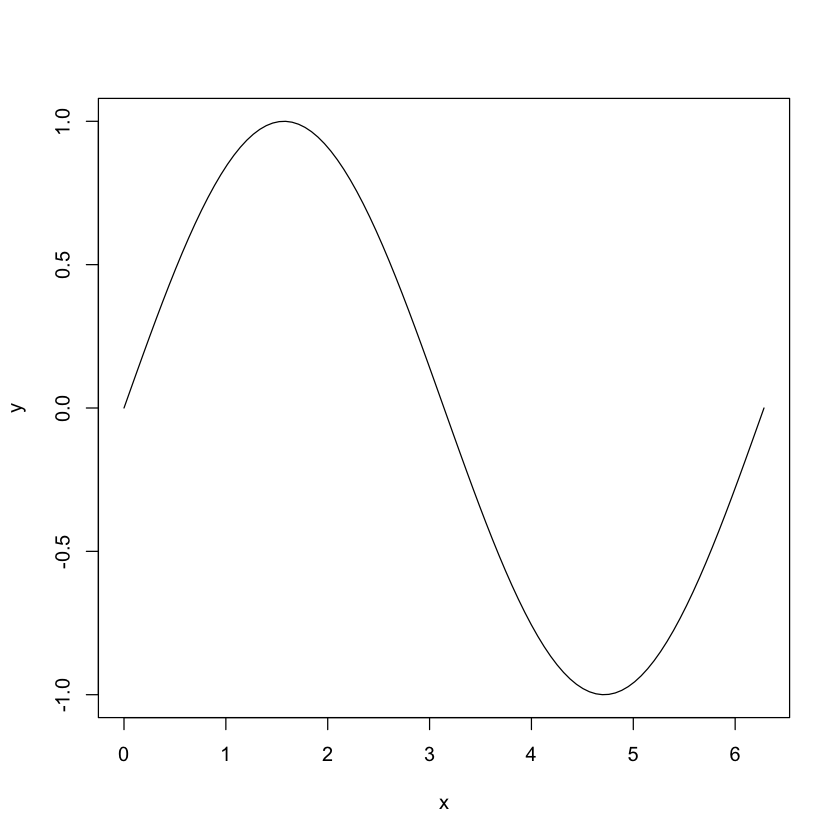

In [135]:
x = seq(from = 0, to = 2*pi, length.out = 100)
y = sin(x)
plot(x, y, type='l')

# Graphs

### Installing Packages

In [3]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

In [4]:
# create random graph
set.seed(0)
g1 = barabasi.game(500, m=1, directed=F)
g2 = erdos.renyi.game(500, p=0.01, directed=F)
# create random graph with given degree sequence
# g3 = degree.sequence.game(rep(2,100))

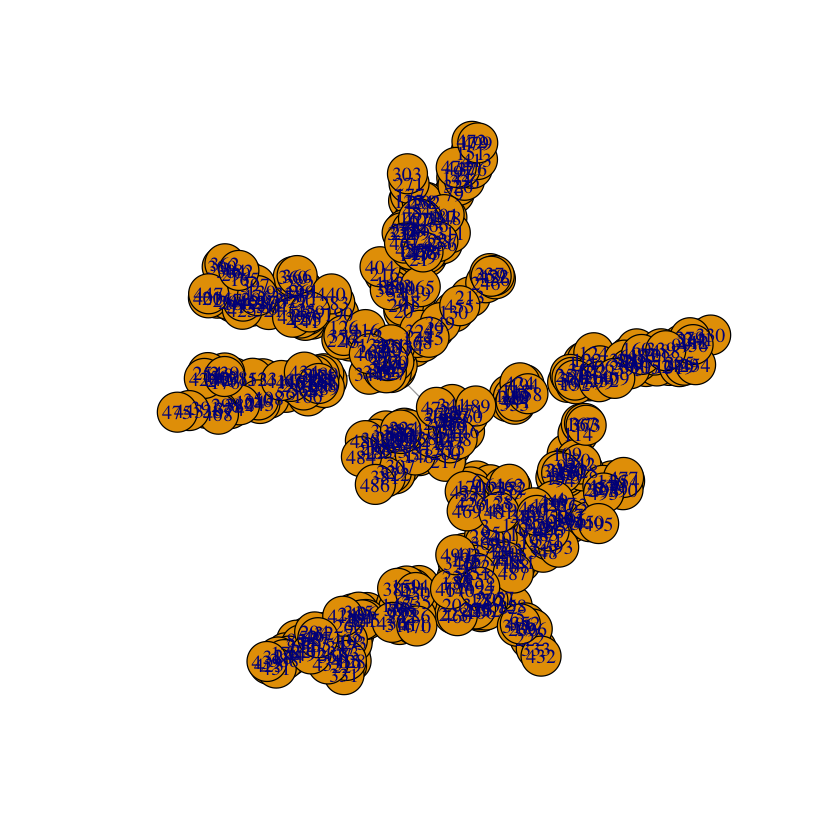

In [5]:
plot(g1)

### Seems not so clear, so let us change plot attributes

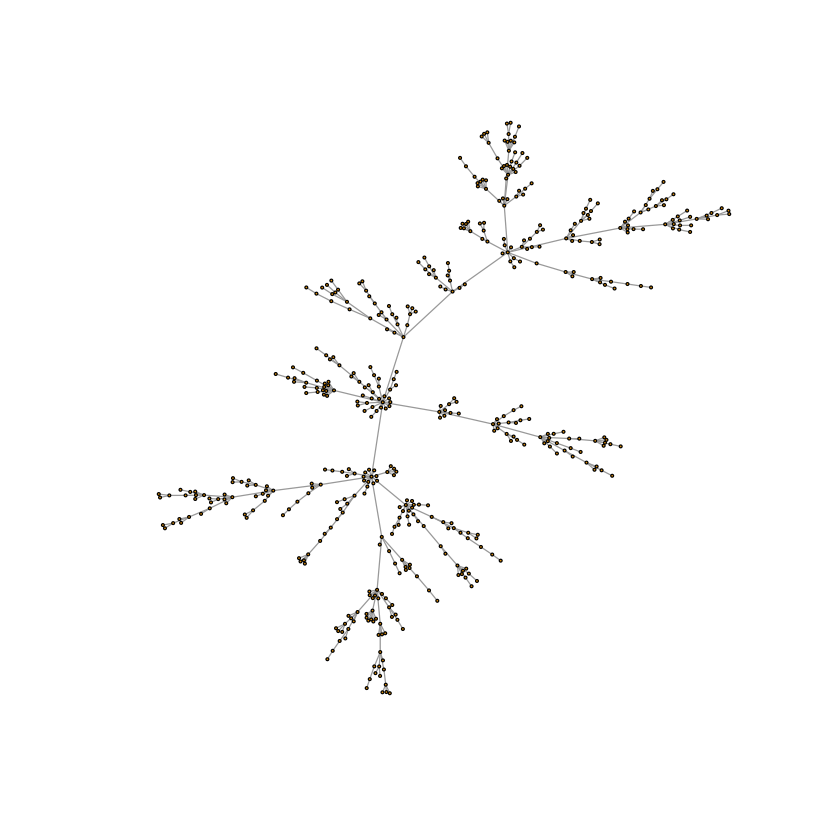

In [11]:
plot(g1, vertex.size=1, vertex.label=NA)
# plot(g1, vertex.size=page_rank(g1)$vector *300, vertex.label=NA)

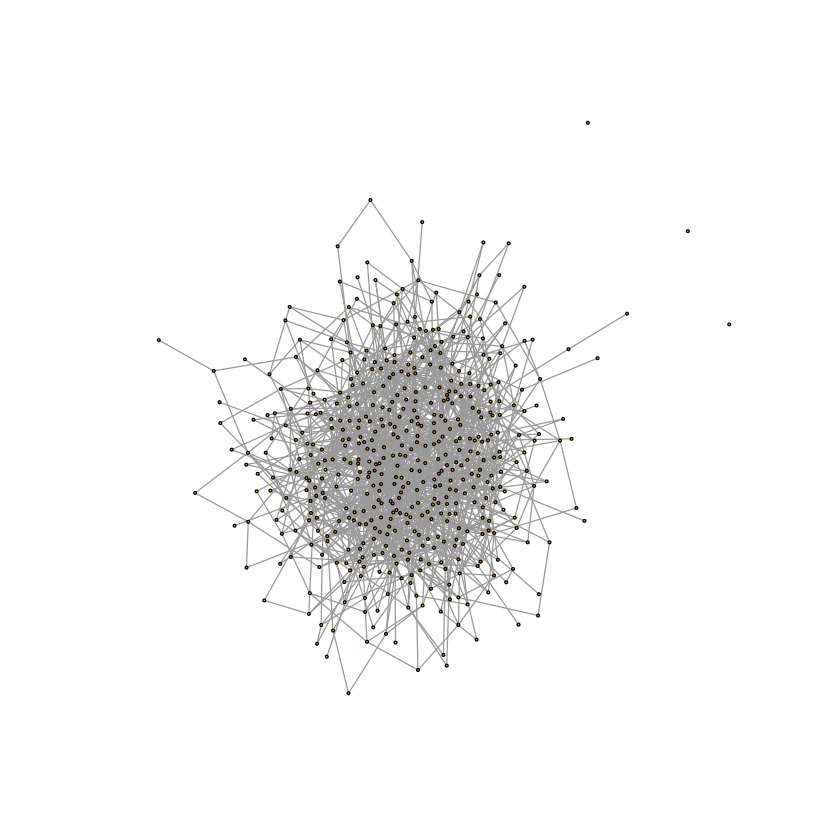

In [146]:
plot(g2, vertex.size=1, vertex.label=NA)

In [80]:
is.connected(g1)
vcount(g1)
ecount(g1)

[1] TRUE

[1] 500

[1] 499

As we see, number of edges is one less then the number of vertices. More details will be provided later.

In [40]:
is.connected(g2)
vcount(g2)
ecount(g2)

[1] FALSE

[1] 500

[1] 1301

The number of edges is close to its expected value: ${{n}\choose 2}p=1247.5$

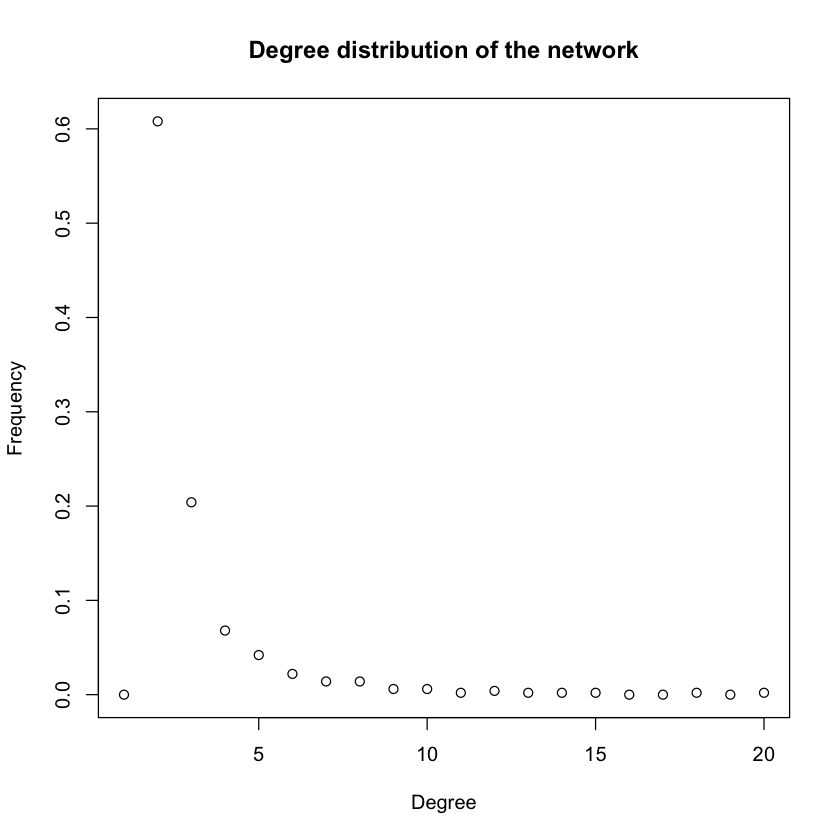

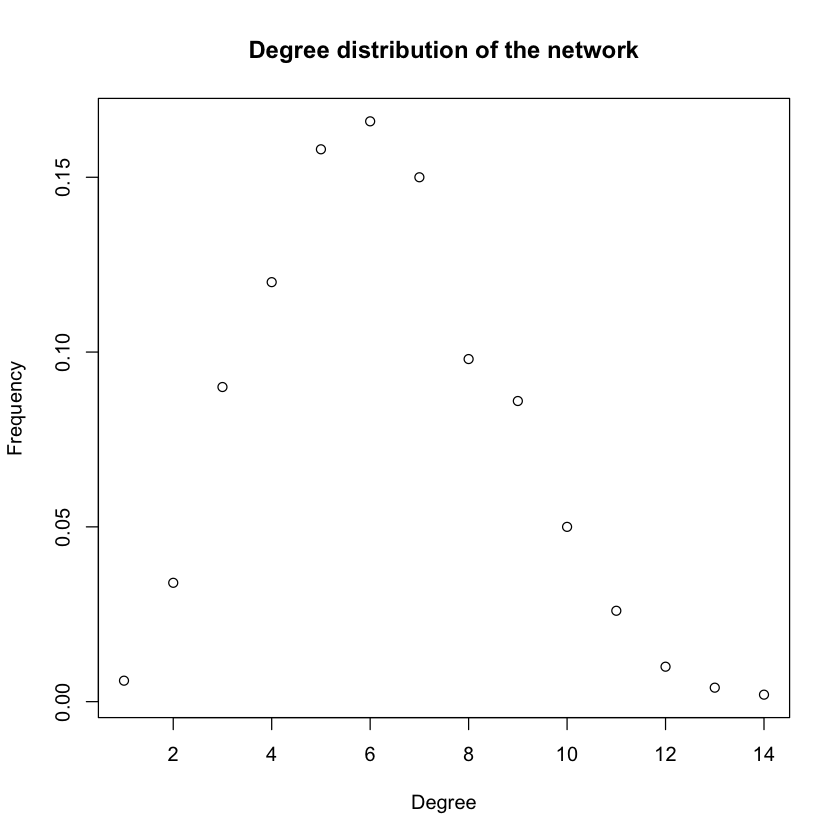

In [142]:
for(g in list(g1, g2)) {
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
}

Make the first plot log-log to see a line

# GCC

In [147]:
# Find GCC
g=g2
g.components <- clusters(g)
print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
gcc <- induced.subgraph(g, which(g.components$membership == ix))

[1] 497   1   1   1


Find the connected component with the largest number of vertices, then remove other vertices.

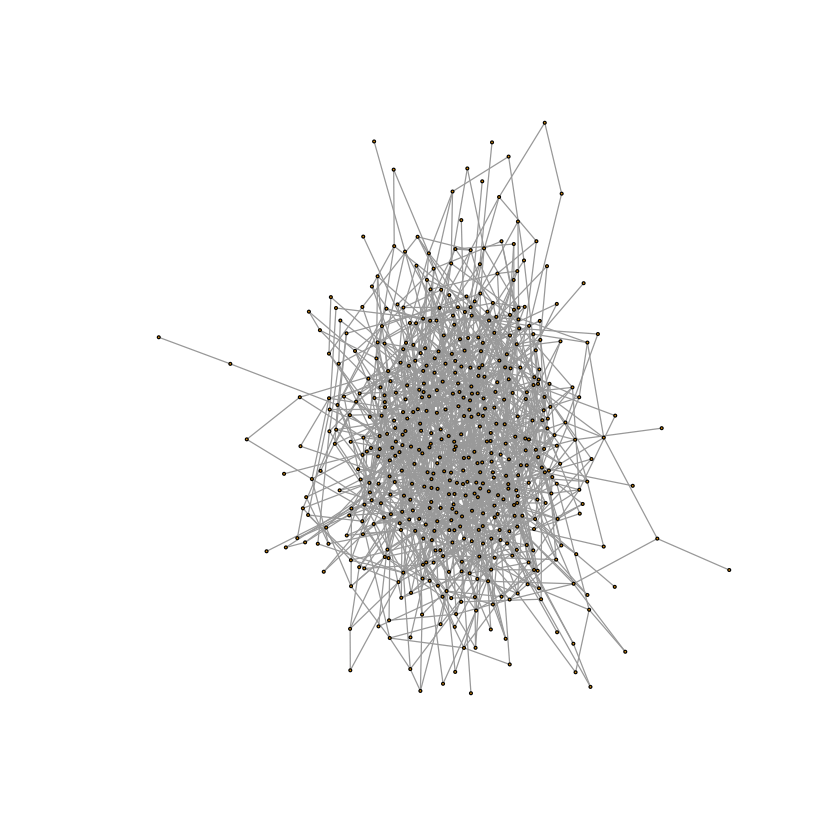

In [119]:
plot(gcc, vertex.size=1, vertex.label=NA)

# Properties of Random Networks

**Degree distribution**
* Erdos-Renyi: if you consider a particular vertex, it can be connected to $n-1$ other vertices, independently by chance $p$. So, $P[deg(v)=k] = {{n-1}\choose k} p^k(1-p)^{(n-1)-k}$, which is a binomial distribution, and for a large $n$ is approximated by a Gaussian.
* Preferential attachment: power law of exponent -3, as shown in the class. A power law curve is one in which the vertical and the horizontal axes are related to each other by $$y = cx^d \Rightarrow \log y = \tilde{c} + d\log x $$As a result, log-log plot of degree distribution of a preferential attachment network is a line with slope of -3.

**Connectedness**
* Erdos-Renyi: not necessarily connected. For instance, a vertex can be so unlucky that it doesn't get any edge to other vertices (by chance $p^{n-1}$)
* Preferential attachment: connected by construction.

**Question: **Why is a preferential attachment network with $m=1$ always a tree?

*Answer*: A tree is defined as a connected graph without cycles. There is another definition for a tree which is equivalent to the previous one: a tree is a connected graph whose number of edges is one less than the number of vertices. Now, note that for construction of a preferential attachment network with $m=1$, each time a vertex is added, except for the first vertex, it comes with $m=1$ edges. As a result, we have $m-1$ edges. Besides, each vertex added, connects to the unique existing connected component. Thus, the graph is connected by induction. According to our second definition of trees, we have a tree. 

** Giant connected component (GCC) **
Giant connected component of a graph with $n$ nodes is a connected component which has $O(n)$ vertices.

For Erdos-Renyi graphs, it can be shown that if $np \rightarrow c > 1$, where $c$ is a constant, then the graph will asymptotically almost surely have a unique giant component.